 IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

createing datafram

In [ ]:
df=pd.read_table(r"/content/Restaurant_Reviews.tsv")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
df['Liked'].nunique()

2

In [ ]:
print(df['Liked'].unique())

[1 0]


In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

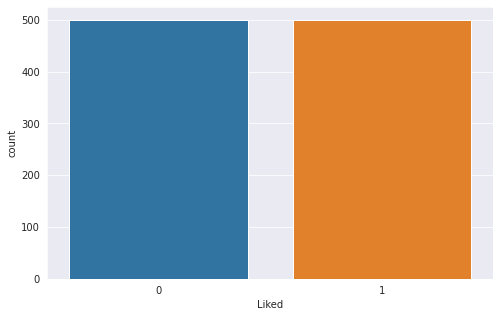

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.Liked);

In [ ]:
df.groupby('Liked').describe()

Review                                    
       count unique                     top freq
Liked                                           
0        500    497  The food was terrible.    2
1        500    499      I love this place.    2

In [ ]:
df['Length'] = df['Review'].apply(len)
df

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


Data Visualizations

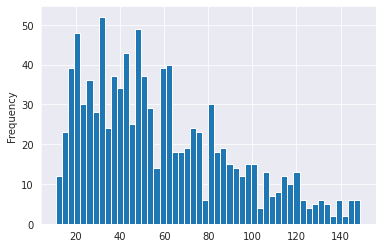

In [ ]:
# Inspeacing length of messages
df['Length'].plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f916d91ef90>,
      dtype=object)

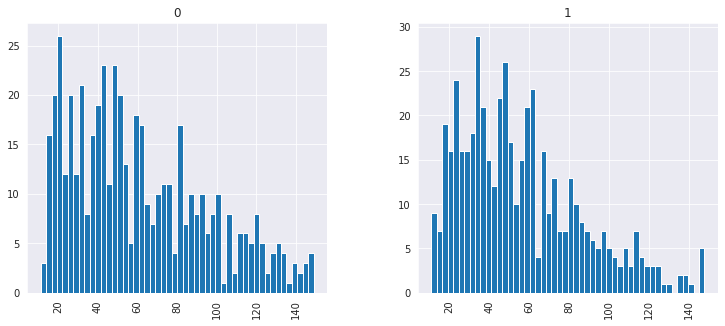

In [ ]:
# Comparing length of messages according to category
df.hist(column='Length', by='Liked', bins=50, figsize=(12,5))

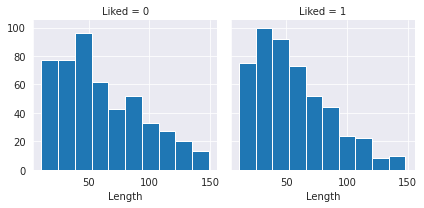

In [ ]:
ll= sns.FacetGrid(df,col='Liked')
ll.map(plt.hist,'Length')

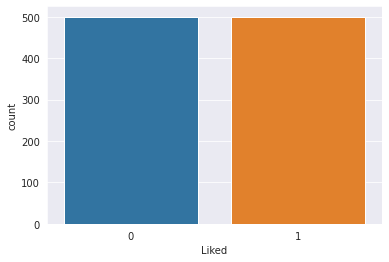

In [ ]:
sns.countplot(x='Liked', data=df)

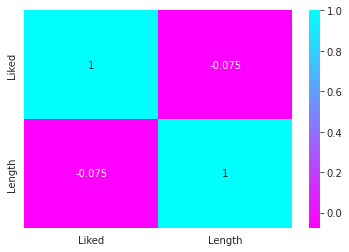

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='cool_r')


NLP Classification

In [ ]:
X = df['Review']
y = df['Liked']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
model=SVC()

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

Predictions and Evaluations


In [ ]:
predictions = nb.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[115  35]
 [ 30 120]]


              precision    recall  f1-score   support

           0       0.79      0.77      0.78       150
           1       0.77      0.80      0.79       150

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



Using Text Processing

creating pipeline

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer


In [ ]:
from sklearn.pipeline import Pipeline


In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


In [ ]:
X = df['Review']
y = df['Liked']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(X_test)

In [ ]:
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(CountVectorizer(),SVC())
text_model.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [ ]:
y_pred=text_model.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[111  39]
 [ 23 127]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       150
           1       0.77      0.85      0.80       150

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



In [ ]:
from sklearn.linear_model import LogisticRegression
import nltk
nltk .download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
import re,string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

def clean_data(data):
    sw= stopwords.words('english')
    sw.remove('not')
    sw.remove("don't")
    sw.remove("shouldn't")
    sw.remove("wouldn't")
    lemma=WordNetLemmatizer()
    ps = PorterStemmer()

    re.sub(r"http\S+|www.*", "", data)     #remove url links
    data = word_tokenize(data.lower())    #lowercase and tokenize the words
    data = [word for word in set(data) if word.isalpha() and word not in string.punctuation and word!='\n' and len(word) > 2 and word not in sw]

    #data = [lemma.lemmatize(word, pos='v') for word in data]
    #data = [ps.stem(word) for word in data]
    return " ".join(data)

df['Review_clean']=df['Review'].apply(clean_data)
df['Review_clean']

0                                        loved place wow
1                                         crust not good
2                                not tasty texture nasty
3      holiday late loved steve rick bank may stopped...
4                            great selection prices menu
                             ...                        
995                    lacking food think texture flavor
996                              appetite gone instantly
997                     impressed not would overall back
998    sushi time think whole ninja next experience u...
999    time check poured drawing salt enough bring wa...
Name: Review_clean, Length: 1000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')

In [ ]:
X_train_vect=vect.fit_transform(X_train)
X_test_vect=vect.transform(X_test)

Save the Model

using joblib

In [ ]:
import joblib
joblib.dump(text_model,'Project')

['Project']

In [ ]:
import joblib
test_model=joblib.load('Project')

Prediction of New Reviews using the Model

In [ ]:
predicted = pipeline.predict(X_test)

In [ ]:
predicted

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

predicted

0=notliked

1=liked

In [ ]:
Project=text_model.predict(["!Love Your Food  and wey of surving and treting you are custamers "])
print(Project)

[1]


In [ ]:
Project=text_model.predict(["hello!!Love Your Food do some more "])
print(Project)

[0]


In [ ]:
Project=text_model.predict(["omg!!it was too spice and i asked you don't add too much "])
print(Project)

[0]


In [ ]:
Project=text_model.predict(["Wow... Loved this place."])
print(Project)

[1]


In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tornado.ioloop


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Add a title to the webapp
st.title("predictionsm of Restaurant_Reviews")
# Load the data (similar to creating a dataframe)
df=pd.read_table(r"/content/Restaurant_Reviews.tsv")
#divide data into input and output
x = Review     #input
y = Liked or not#output
# Import the KNN model
model = LogisticRegression
#Fit the model
model.fit(x,y)
# print the predicted output
op = ['Liked','not Liked']
st.title(op[y_pred[0]])



Overwriting app.py


In [ ]:
 !streamlit run app.py & npx localtunnel --port 8501

2022-07-11 11:49:06.909 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 3.38s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.233.157.200:8501

your url is: https://tasty-grapes-slide-35-233-157-200.loca.lt
